In [10]:
"""
Author: Paul Z. Hanakata
2018 
Boston University
This code generates LAMMPS input atomic positions 
"""
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import sys 
sys.path.append("../tools/")

#module to handle mapping strings <-> arrays
from helper_functions import * 
#module to read and preprocess raw data
from preprocess import * 
#module to generate lattice
from generate_lattice import * 
#module to generate combinations based on symmetry
from generate_combinations import *

In [11]:
"""Unit cell parameters

Parameters: 
Units are in Angstrom   
---------------------------------------------
cell_x, y, z : float 
    cell lattice vector in x, y, z direction  
ncell_x, y, z : int 
    number of cells in x, y, z direction 
NCcell_x, y : int 
    number of coarse cut grid
    

Attributes:
-------------------------------------------
Lx, Ly, Lz: float
    Systems dimensions
cx, cy: float
    Cut dimensions 
"""
cell_x = 4.118 
cell_y = 2.37752840852
cell_z = 4.118 

ncell_x = 17
ncell_y = 40
ncell_z = 0
#make cells in postive x and negative x
ncell_x = 2*ncell_x
ncell_y = 2*ncell_y

#coarse grain cuts 
NCcell_x = 3
NCcell_y = 5

Lx = cell_x * ncell_x # ribbon length
Ly = cell_y * ncell_y # ribbon width 
Lz = cell_z * 1 #thickness, the actual value doesn't matter because we use wrap boundary condition in LAMMPS

#cut sizes
cx = (Lx-4*cell_x)/NCcell_x
cy = (Ly)/NCcell_y

In [12]:
print("Ribbon dimensions Lx="+str(Lx)+"A, Ly="+str(Ly)+"A" )
print("One single cut(hole) dimensions cx="+str(cx)+"A, cy="+str(cy)+"A" )
#thinning in monolayer/few layers phosphorus using TEM can go to few nm
#ACS Nano, 2016, 10 (6), pp 5687–5695! 

Ribbon dimensions Lx=140.012A, Ly=190.2022726816A
One single cut(hole) dimensions cx=41.18A, cy=38.04045453632A


In [13]:
"""
Main function
Generate all configurations from combinations functions 
"""

l = generate_binary(NCcell_x*NCcell_y, [])
listBinary = findCombinations_rs_yxy(l, NCcell_x, NCcell_y,12)

start = 0
end  = len(listBinary)

listAll =[]
listDensity=[]
data_base=[]
#careful with this '4'! 
for rd in range(start, end, 4):
    
    #file name
    filename = "geo.kirigami_d0.20_sAC_"
    
    stringsBinary = listBinary[rd]
    cutConfigurations = toArray(stringsBinary)

    
    #create genome_ID in string format
    genome_ID = toString(cutConfigurations)  
    
    #create PRISTINE inner region
    inner = generateInnerCell(NCcell_x, NCcell_y, ncell_x, ncell_y)
    #cut inner region
    inner_wCuts = makeCutsonCell(cutConfigurations, inner, NCcell_x, NCcell_y, ncell_x, ncell_y)
    #add edges with not cuts for loading in LAMMPS simulations 
    kirigami = addEdges(inner_wCuts, ncell_x, ncell_y)

    #create graphene lattice with cuts
    la = generateLattice(kirigami, NCcell_x, NCcell_y, ncell_x, ncell_y, cell_x, cell_y, cell_z, Lx, Ly, Lz)
    
    #get boundary 
    xhi, xlo, yhi, ylo, zhi, zlo = getSize(la)
    listAll.append(la)
    
    #UNFLAG this to save LAMMPS input output files 
    #writeInput(rd//4, la, filename)

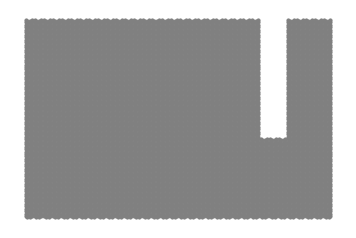

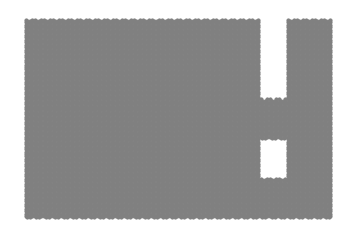

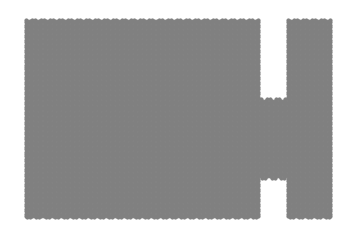

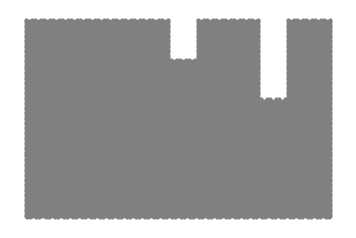

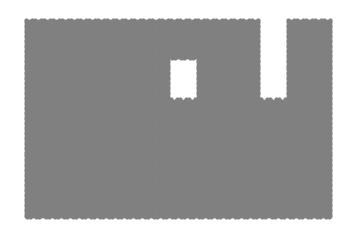

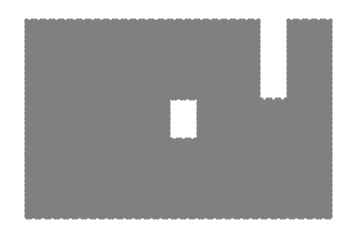

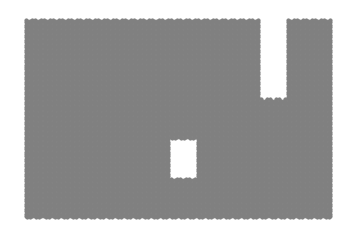

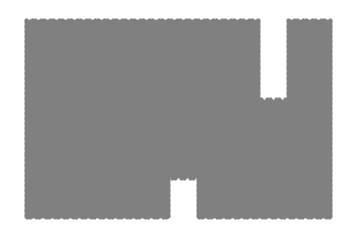

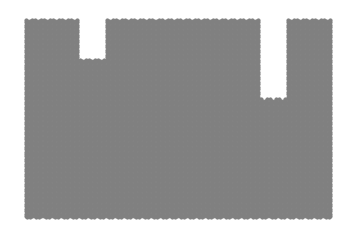

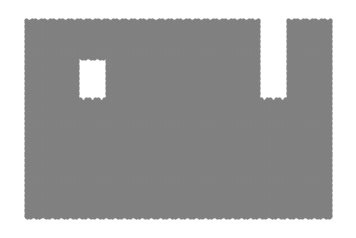

In [8]:
"""
Function to visualize kirigami
"""
import matplotlib.pyplot as plt

fig = plt.figure()
#sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})


#for j in range(len(listAll)):
for j in range(0, 10):
    #j=0
    listAtoms = listAll[j]
    X = np.zeros(len(listAtoms))
    Y = np.zeros(len(listAtoms))
    Z = np.zeros(len(listAtoms))
    for i in  range(len(listAtoms)):
        X[i] = listAtoms[i][0]
        Y[i] = listAtoms[i][1]
        Z[i] = listAtoms[i][2]
    
    plt.scatter(X, Y, alpha=1, s=10, color='grey')
    #plt.xlabel('X(A)')
    #plt.ylabel('Y(A)')
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
    #fig.patch.set_visible(False)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()
